# Neuron

Vectorize the Neuron:

* `z` - Vector of Size `M` (Column vector of size `M`x1)
* `x` - Vector of Size `D` (Column vector of size `D`x1)
* `W` - Matrix of size `M`x`D`
* `b` - Vector of size `M`
* `o-()` - Element-Wise operation



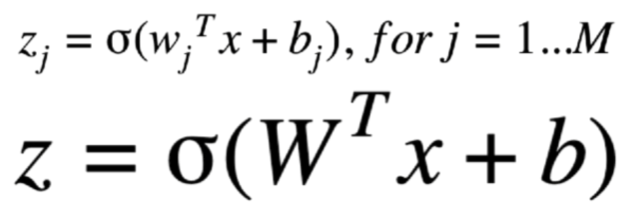

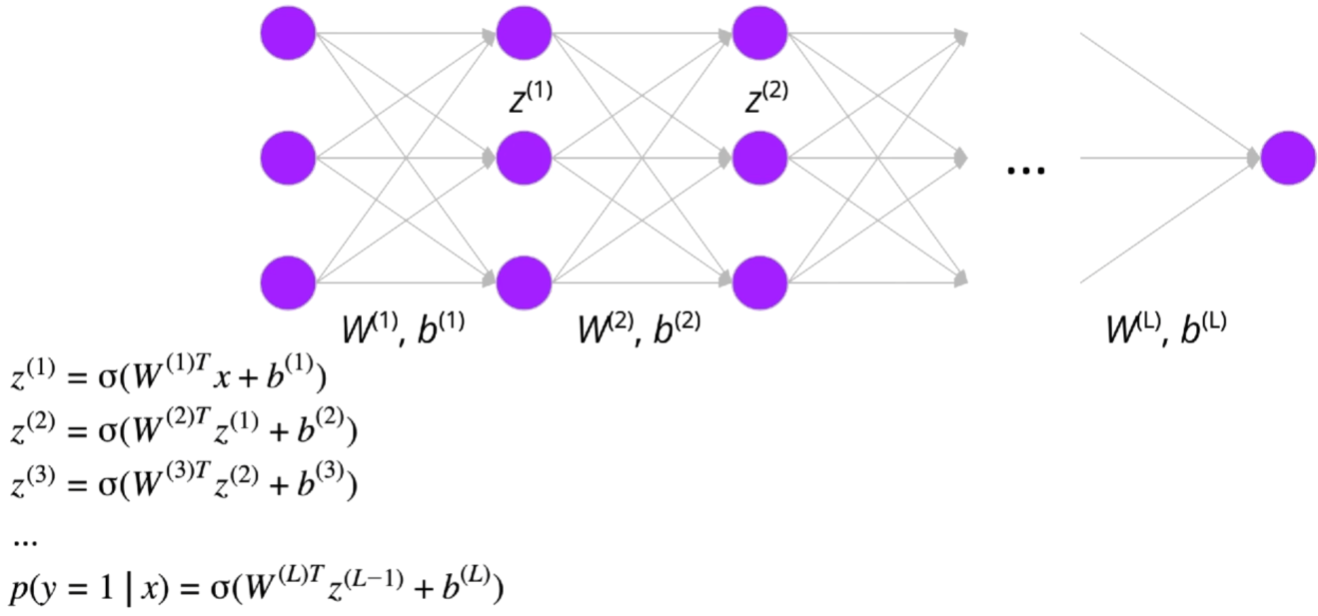

## Regression

We dont want the final sigmoid.

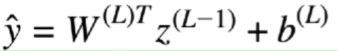

# Each layer is a Feature Transformation

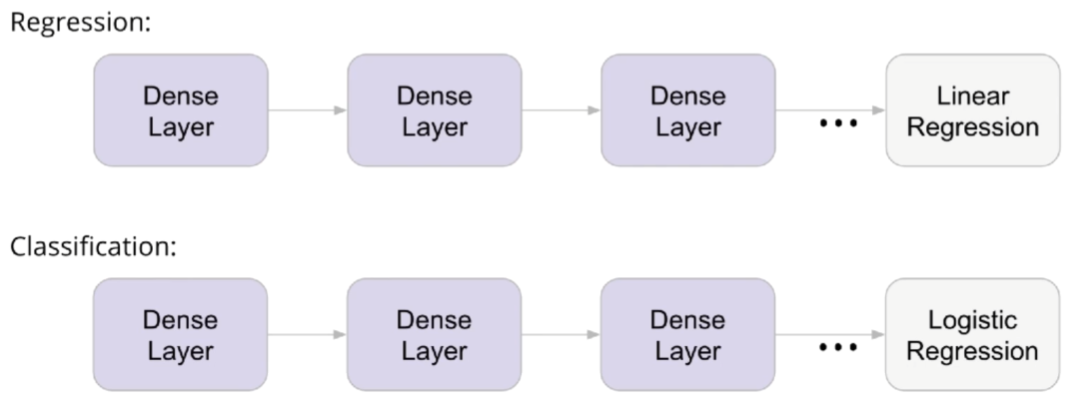

# Deep Learning

Each layer learns increasingly complex features, motivating deeper networks.


Large Weights - Important
Small Weights = Not important

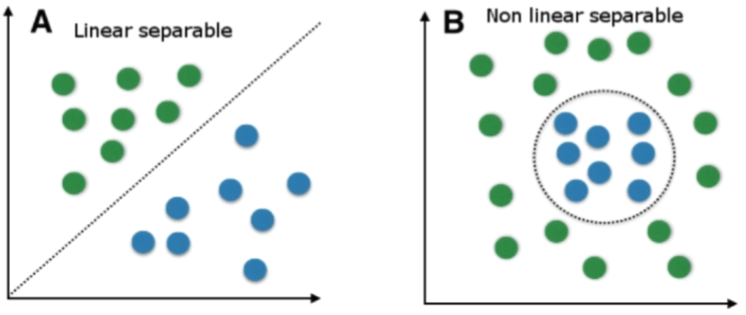

* Each neuron computes a different nonlinear feature (Ex: Sigmoid Activation)


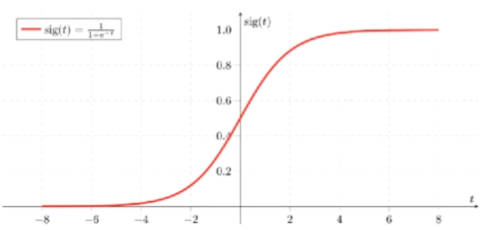

## Nonlinear boundry

Cannot reduce the neural network equation in linear form, we can lose the relationship between the X axis and the features.

* Linear

$$ W^Tx  + b$$

* 2D

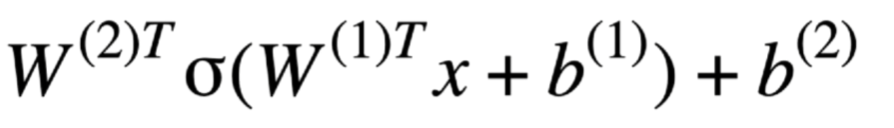

If we don't have any `sigmoid`(No activation)


Then we reduce our neural network to linear


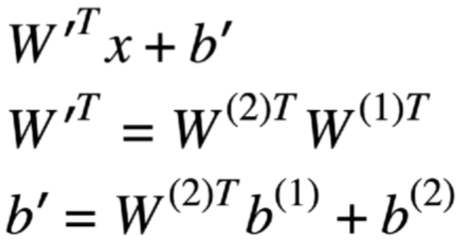

This is why we need activation functions to add complexity.

### Automatic Feature Engineering with Neurons

* `W` and `b` randomly initialized, found iteratively using `gradient descent`(Default)
* Don't need domain knowledge


The problem is gradient descent starts in the last neuron and sigmoid function ranges between 0 and 1, when we multiply something below 1, we get a more complex number (0.25^5~=0.001), this will become a problem to compute. (Vanishing Gradient Problem), updates with sigmoid closer to the root become less trained with the same resources.

Solution:
* `Greedy layer-wise pretraining`, separates layers for training for training.
* Don't use activation functions with vanishing gradients (Sigmoid), use `ReLU`.

### TensorFlow Playground

* [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.19320&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Activation Functions

#### Sigmoid

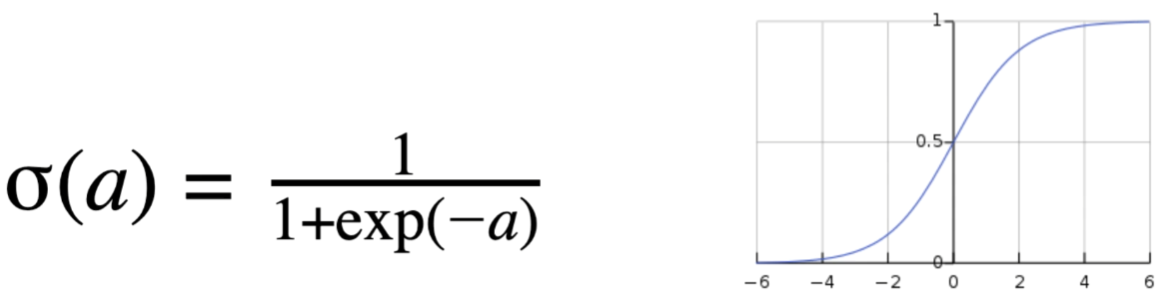

Makes non linear.

#### Standardization | Sigmoid

* Scaling data in some range, standard scale for features.
* Sigmoid outputs values between `0` and `1`, center `0.5`.


#### Hyperbolic tangent (tanh)

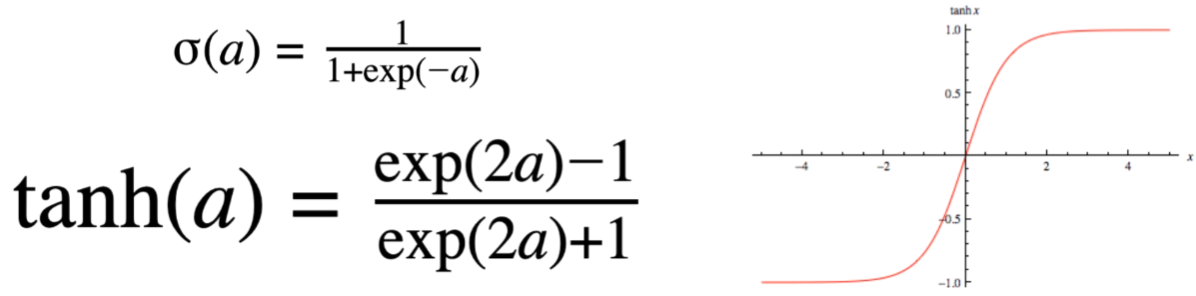

#### Standardization | Hyperbolic tangent

* Scaling data in some range, standard scale for features.
* Sigmoid outputs values between `-1` and `1`, center `0`.

### ReLU

Because of vanishing gradients (Sigmoid), we use `ReLU`.

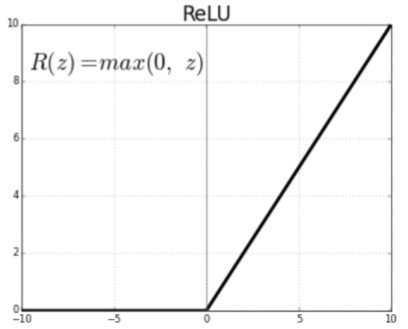

In the left derivative is 0, the left gradient is already vanished.

This can cause `death neurons`, always end in 0.

We can fix this whith:

* Leaky ReLu (LReLU)

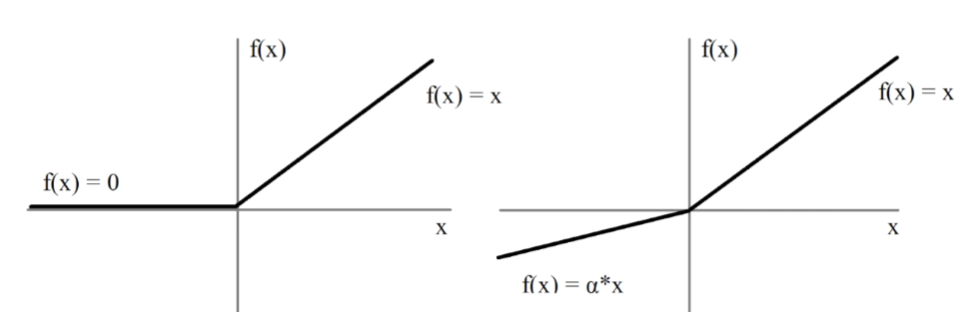

* Exponential Linear Unit (ELU) - Can lead to higher accuracy, possible negative values, the mean can be zero (Unlike Relu)
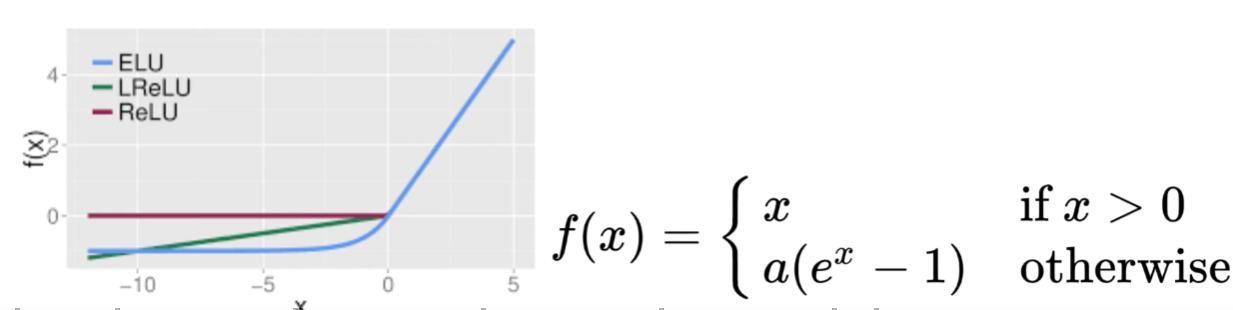

* Softplus
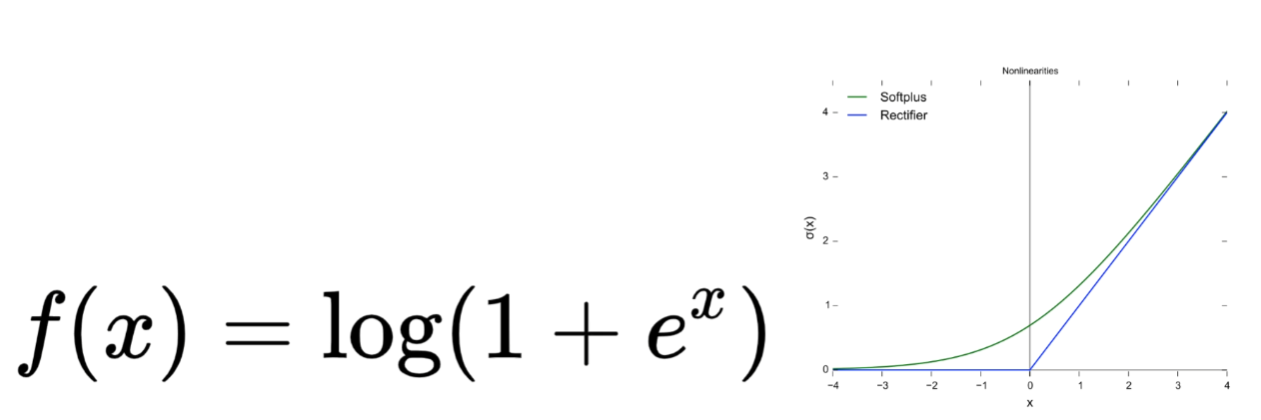


We have vanishing problem in this, but isn´t problematic because ReLU derivative.


* BRU (Bionodal Root Unit)
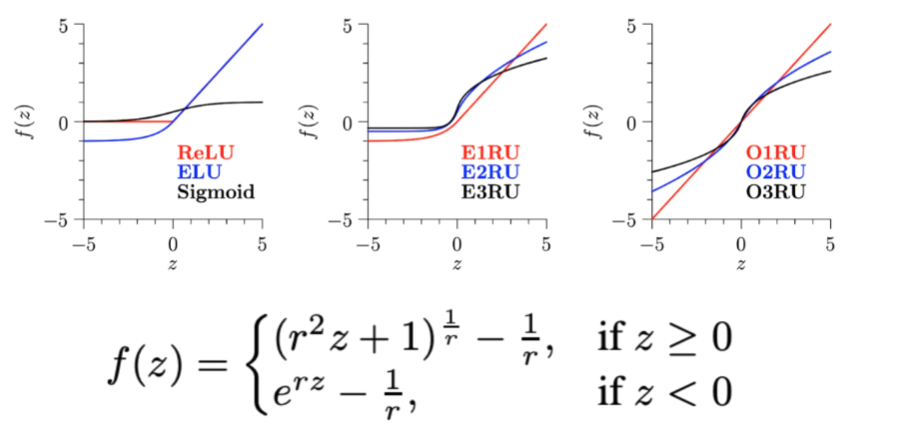

Better results with some natural frequency data.

#### ReLU - Biological Plausibility

More plausible than sigmoid:

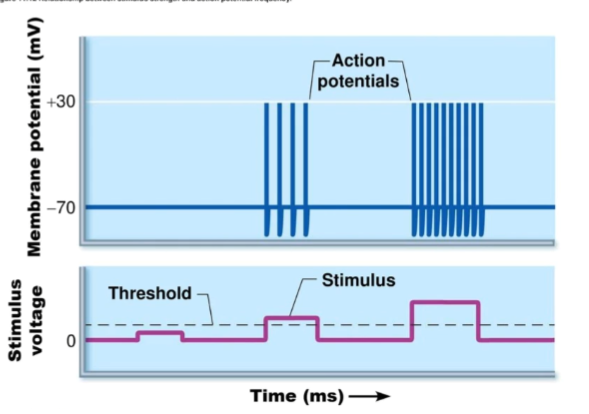

ReLU - Minimun is 0

# Multiclass Classification

* Binary classification use `Sigmoid`
* We use ReLUs inside hidden layers and `Sigmoid` for Output.

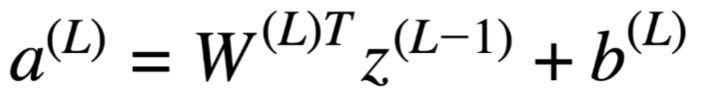

* `a^(L)` - Vector of size K
* `k` = 5

### Softmax

* exp(number) is positive
* dominator is sum(values)

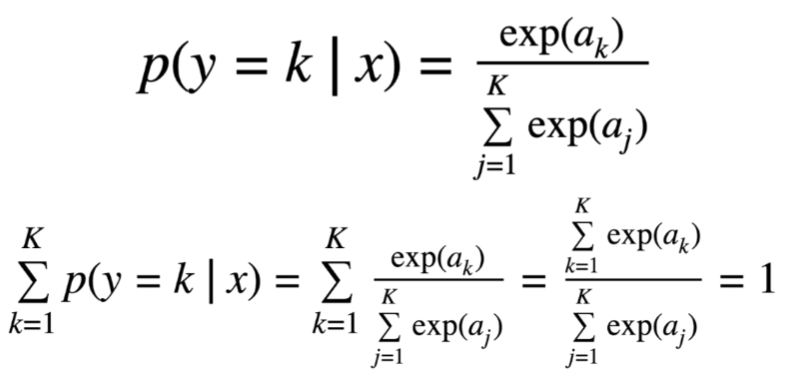

Not meant for hidden layers / activations, use in the end / ouput.

Resume:

* `Regression` - None | Identity
* `Binary Classification` - Sigmoid
* `Multiclass Classification` - Softmax

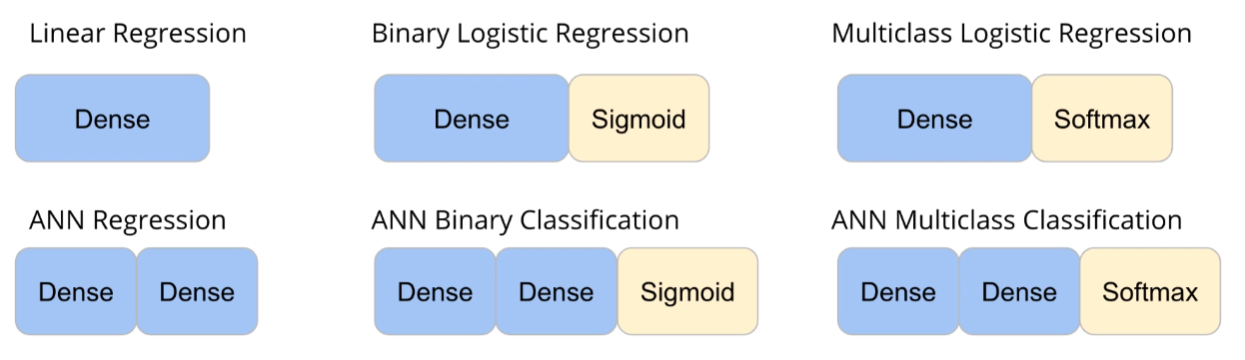

Model Type doesn´t matter.

Softmax handles multiple classes, we can use in binary too.

### Image Representation

* x = i
* y = j

Image = array[i, j](color, light_intensity)

color = (r, g, b)

8 bits | 1 byte - (0, 2^8=255)

rgb = 2^8 * 2^8 + 2^8 = 16.8 Milion Colors

Needed bits:
* 500px * 500px * rgb * 8bits = 500 * 500 * 3 * 8 = 6 milion bits / 8 = 750,000 bytes / 1024 = 732.42kb - `Raw`
* Grayscale uses 2-D array, instead of (r, g, b), uses (b, w) (black, white)

Compression:
* `JPEG`
* `PNG`

Image Neural Input:

* `VGG Models` Not scale input data, subctract the mean across each color channel, we need to use: `tf.keras.applications.vgg16.preprocess_input`

* flattening

Array`[3x3]3D`:

|   |  |  |
| ------------- | ------------- | ------------- |
| pixel1  | pixel2  | pixel3  |
| pixel4  | pixel5  | pixel6  |
| pixel7  | pixel8  | pixel9  |


Array.Flatten() = [pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9] - `[1x9]1D`

Each Sample is a flatten image

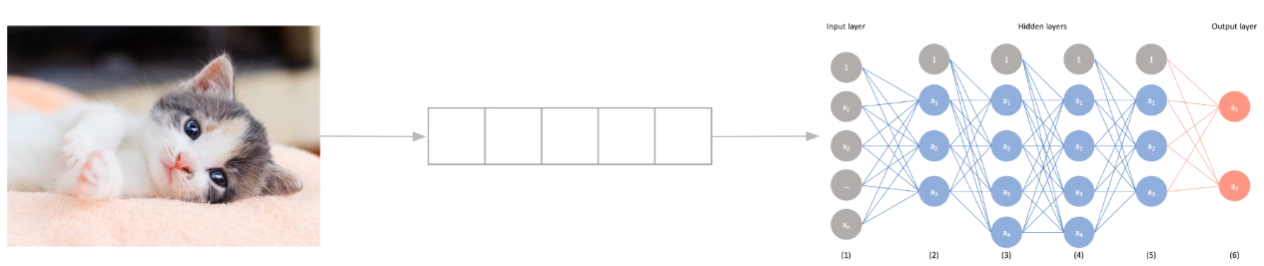

#### Ploting Images

`matplotlib`

GrayScale:

`plt.imghow(array2d)` - Heatmap (Default: min(blue), max(red))

So we need to use gray scale instead:

* `plt.imghow(array2d, cmap=´gray´)`

#### Colors

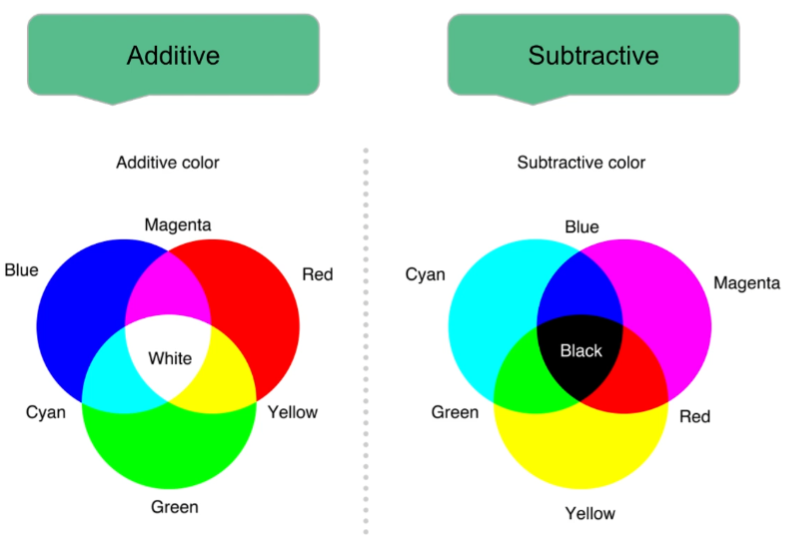

# Artificial Neural Network (ANN) - Implementation for Classification

MNIST Dataset (0 to 9 digits) handwriteen digits for classification.
Greyscale images.

Steps:
1. Load Data
2. Build Model - Multiclass logistic regression
3. Train Model
4. Evaluate - Model-Agnostic (don't care about what the model is)
5. Predict

#### 1 - Load Data

* 28 * 28 = 784 pixels (grayscale)

* `(x_train, y_train), (x_test, y_test) = mnist.load_data()`
* `x_train.shape = N x 28 x 28`
* `y_train.shape = N`
* Scaling pixels values (0, 255) => (0, 1)
* Keras handle flattening


In [64]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0   # Scale rgb to (0, 1)
print("Shape: ", x_train.shape)
print(x_train[0][20])

Shape:  (60000, 28, 28)
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.45 0.87 0.99
 0.99 0.99 0.99 0.79 0.31 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


#### 2 - Build Model

* First layers with ReLU (128 nodes)
* Hyperparameter = 128, we can use `Random Search` to tweak this
* Dropout(0.2), randomly drops nodes inside layers, 20% of droping one
* Second Layer with Softmax for classification (10 nodes = 10 classes)

In [65]:
# Build
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 3 - Train Model

* `adam` Gradient Descent
* Loss - `sparse_categorical_crossentropy`
* metrics - Accuracy

In [66]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Categorical Metric
              )

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2983 - accuracy: 0.9136 - val_loss: 0.1443 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1441 - accuracy: 0.9573 - val_loss: 0.1038 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1083 - accuracy: 0.9674 - val_loss: 0.0915 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0898 - accuracy: 0.9718 - val_loss: 0.0841 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0752 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.0791 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0572 - accuracy: 0.9814 - val_loss: 0.0708 - val_

#### Cross-Entropy Loss

* `k` - Output probabilities(classes) k=10 in our case
* One-hot encoding y=9, y^(OH) = [0, 0, 0, 0, 0, 0, 0, 0, 1]

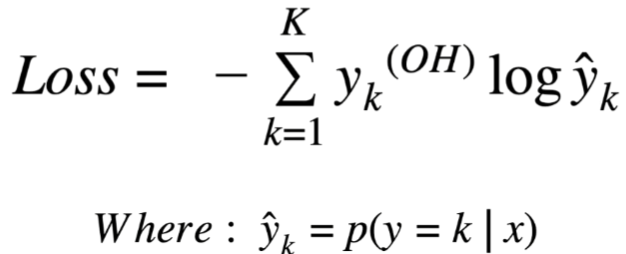

Perfect prediction:

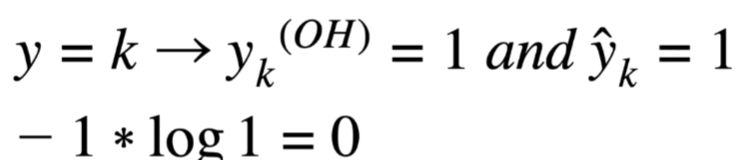

Wrong prediction:

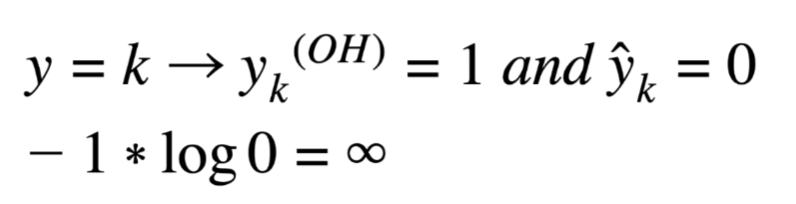

The target is to get closer to 0

#### Why "Sparce"

Becase in Hot-encoding most of numbers are 0, when we multiply by 0, they don't contribute for the loss, so we can calculate directly on index 9:

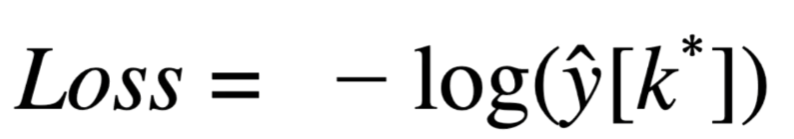


We don't compute other entries with


#### Plot Loss

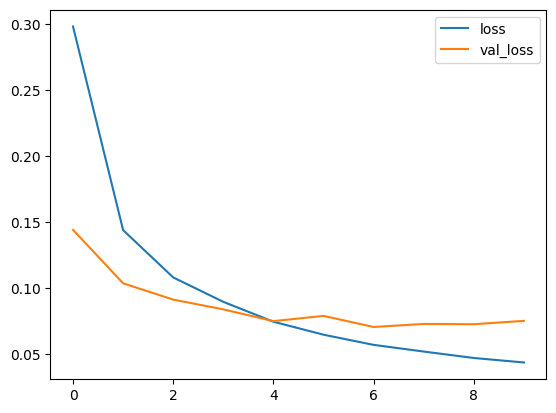

In [67]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

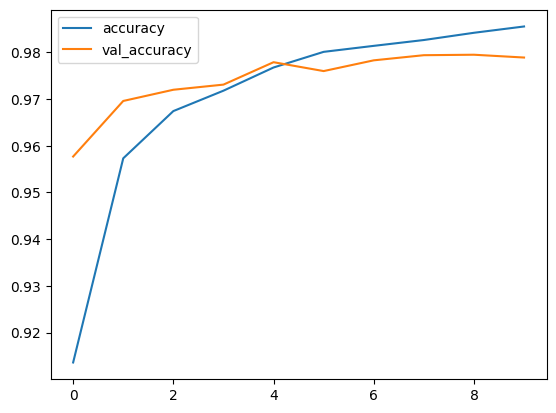

In [68]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

#### 4 - Evaluate



In [69]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9789
[0.07540007680654526, 0.9789000153541565]


#### 5 - Predict

#### Plot Confusion Matrix

[Sklearn Function](https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html)

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[ 971    0    2    1    1    1    1    1    2    0]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   1    0 1014    3    3    0    2    4    5    0]
 [   1    0    1  998    0    1    0    3    3    3]
 [   2    1    1    0  958    0    5    3    3    9]
 [   2    0    1   12    0  867    1    0    7    2]
 [   5    2    3    1    4    3  939    0    1    0]
 [   3    7   13    3    0    0    0  993    1    8]
 [   4    0    1    7    2    4    2    3  951    0]
 [   2    3    0    8   10    4    0    2    6  974]]


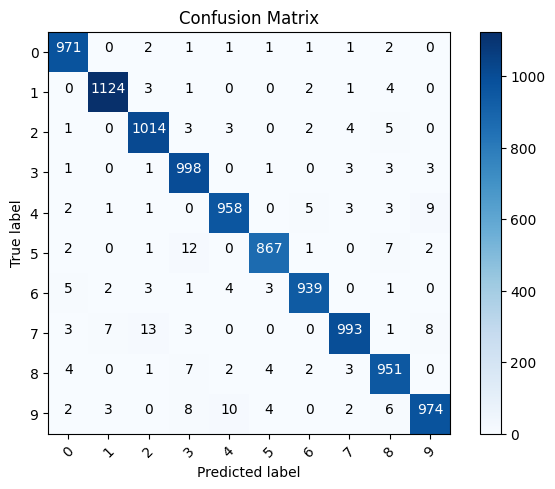

In [70]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot Confusion Matrix
p_test = model.predict(x_test).argmax(axis=1) # Predict
cm = confusion_matrix(y_test, p_test)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, list(range(10)), title='Confusion Matrix')

plt.show()

Predict 24 numbers as 3, when 5 was the real value.

Pridected 8 numbers as 4, when 4 was the real value.

#### Show misclassified Example

Text(0.5, 1.0, 'True value: 2 Predicted value: 7')

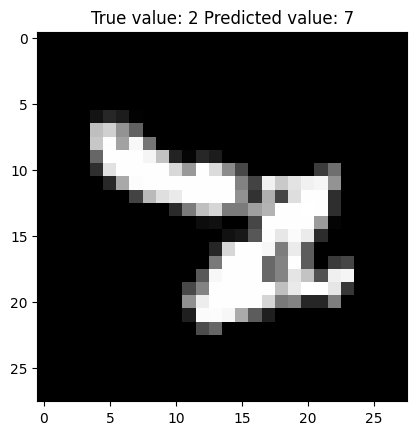

In [71]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True value: %s Predicted value: %s" % (y_test[i], p_test[i]))

# Artificial Neural Network (ANN) - Implementation for Regression


Steps:
1. Create Data
2. Build Model - Multiclass logistic regression
3. Train Model
4. Evaluate - Model-Agnostic (don't care about what the model is)
5. Predict

#### 1. Create Data

We can load any dataset instead, with discrete or continuous features.

In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 1000
X = np.random.random((N,2)) * 6 - 3 # Uniformly distributed between -3 and 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

Custom Dataset implements this:

$$ y = cos(2x_1) + cos(3x_2) $$

#### Plot 3D Data

Run this locally to move the plot or zoom in

Waves like expected

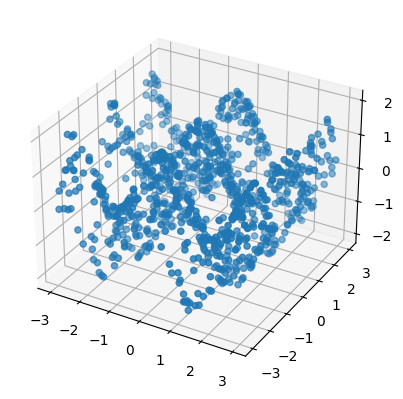

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

* [Pyplot Express](https://plotly.com/python/3d-scatter-plots/)

In [74]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'Y': Y})
fig = px.scatter_3d(df, x='X1', y='X2', z='Y',
              color='X1')
fig.show()

#### 2. Build Model

Regression don't need activation function in the end.

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

#### 3. Train Model

In [85]:
# Compile
opt = tf.keras.optimizers.Adam(0.01)    # Gradient Descent
model.compile(optimizer=opt, loss='mse')  # Mean Squared Error

# Fit
r = model.fit(X, Y, epochs=100)   # We can use random search to tweak this

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0019
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9441
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9390
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9210
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9103
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8673
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7833
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7172
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6384
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6043
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5711
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5431
Epoch 13/100
32/32 [=================

#### 4. Evaluate

* Loss
* Prediction Surface
* Surface

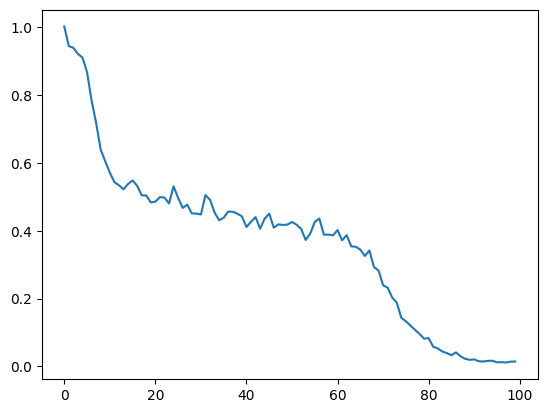

In [86]:
# Loss
plt.plot(r.history['loss'], label='loss')
plt.show()

#### 5. Predict

We can export `.py` and run locally to move the graph or zoom it.

79/79 [==============================] - 0s 5ms/step


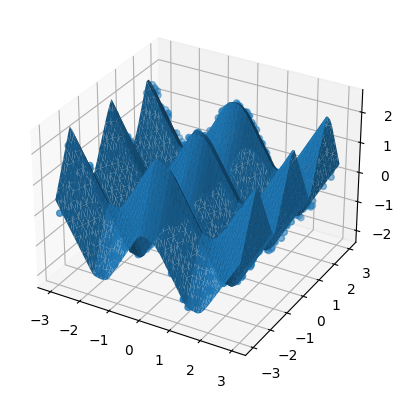

In [87]:
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface Plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()


#### Can Extrapolate?

The function repeat periodically from minus infinity to plus infinity. The network can figure that?

We will change the range from (-3, 3) to (-8, 8)

Can't, to do this we need a periodic activation function.

79/79 [==============================] - 1s 6ms/step


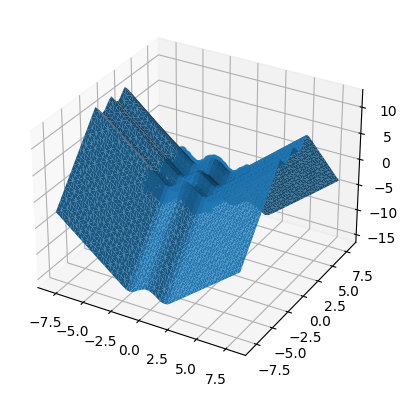

In [88]:
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface Plot
line = np.linspace(-8, 8, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()